In [2]:
import sys
from pathlib import Path
ROOT = Path.cwd().parents[1]
sys.path.insert(0, str(ROOT))

from src import preprocessing as pre
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
from kloppy.domain import Time, Period, PositionType
from mplsoccer import Pitch, VerticalPitch

In [12]:
match_id = 1886347
df, metadata = pre.load_tracking_as_long_dataframe(match_id)

In [13]:
home, away = metadata.teams

team_id = home.team_id

frame_id = 100

In [14]:
df_team = df[df.team_id == team_id]

In [15]:
df_team[df_team.frame_id == frame_id]

,frame_id,timestamp,period_id,ball_state,ball_owning_team_id,ball_x,ball_y,player_id,x,y,jersey_no,first_name,last_name,name,team_id,position
791,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,14736,-5.01,-22.41,6,Louis,Verstraete,Louis Verstraete,4177,DM
792,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,23418,-10.79,-11.59,28,Luis Felipe,Gallegos Leiva,Luis Felipe Gallegos Leiva,4177,AM
793,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,33697,-20.63,-6.51,4,Nando,Pijnaker,Nando Pijnaker,4177,LCB
794,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,38673,6.05,-25.23,10,Guillermo Luis,May Bartesaghi,Guillermo Luis May Bartesaghi,4177,ST
795,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,50951,7.18,-12.65,22,Jake,Brimmer,Jake Brimmer,4177,ST
800,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,51667,-21.11,-14.31,23,Daniel,Hall,Daniel Hall,4177,RCB
801,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,51713,-15.82,-23.10,17,Callan,Elliot,Callan Elliot,4177,UNK
802,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,133498,-19.43,5.82,15,Francis,De Vries,Francis De Vries,4177,UNK
803,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,133501,-4.89,-28.35,27,Logan,Rogerson,Logan Rogerson,4177,RW
805,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,285188,-41.16,-3.10,12,Alex Noah,Paulsen,Alex Noah Paulsen,4177,UNK


In [16]:
df_team = pre.exclude_goalkeepers_for_match(df_team)


/Users/martin/Documents/Projects/SkillCornerHackaton/analytics_cup_research/src/preprocessing.py:194: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(pick_gk_for_frame)


In [17]:
df_team[df_team.frame_id == frame_id]

,frame_id,timestamp,period_id,ball_state,ball_owning_team_id,ball_x,ball_y,player_id,x,y,jersey_no,first_name,last_name,name,team_id,position
360,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,14736,-5.01,-22.41,6,Louis,Verstraete,Louis Verstraete,4177,DM
361,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,23418,-10.79,-11.59,28,Luis Felipe,Gallegos Leiva,Luis Felipe Gallegos Leiva,4177,AM
362,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,33697,-20.63,-6.51,4,Nando,Pijnaker,Nando Pijnaker,4177,LCB
363,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,38673,6.05,-25.23,10,Guillermo Luis,May Bartesaghi,Guillermo Luis May Bartesaghi,4177,ST
364,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,50951,7.18,-12.65,22,Jake,Brimmer,Jake Brimmer,4177,ST
365,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,51667,-21.11,-14.31,23,Daniel,Hall,Daniel Hall,4177,RCB
366,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,51713,-15.82,-23.10,17,Callan,Elliot,Callan Elliot,4177,UNK
367,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,133498,-19.43,5.82,15,Francis,De Vries,Francis De Vries,4177,UNK
368,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,133501,-4.89,-28.35,27,Logan,Rogerson,Logan Rogerson,4177,RW
369,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,965685,-5.47,1.56,14,Liam,Gillion,Liam Gillion,4177,LW


In [18]:
df_frame = df_team[df_team.frame_id == frame_id]



df_players = df_frame



df_players.head()


,frame_id,timestamp,period_id,ball_state,ball_owning_team_id,ball_x,ball_y,player_id,x,y,jersey_no,first_name,last_name,name,team_id,position
360,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,14736,-5.01,-22.41,6,Louis,Verstraete,Louis Verstraete,4177,DM
361,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,23418,-10.79,-11.59,28,Luis Felipe,Gallegos Leiva,Luis Felipe Gallegos Leiva,4177,AM
362,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,33697,-20.63,-6.51,4,Nando,Pijnaker,Nando Pijnaker,4177,LCB
363,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,38673,6.05,-25.23,10,Guillermo Luis,May Bartesaghi,Guillermo Luis May Bartesaghi,4177,ST
364,100,0 days 00:00:09,1,alive,1805,-12.78,-19.42,50951,7.18,-12.65,22,Jake,Brimmer,Jake Brimmer,4177,ST


In [19]:
points = df_players[['x', 'y']].values
hull = ConvexHull(points)
hull

In [20]:
hull.volume

670.5658500000002

(<matplotlib.collections.PathCollection at 0x1680d3390>,
 <matplotlib.collections.PathCollection at 0x1680d34d0>)

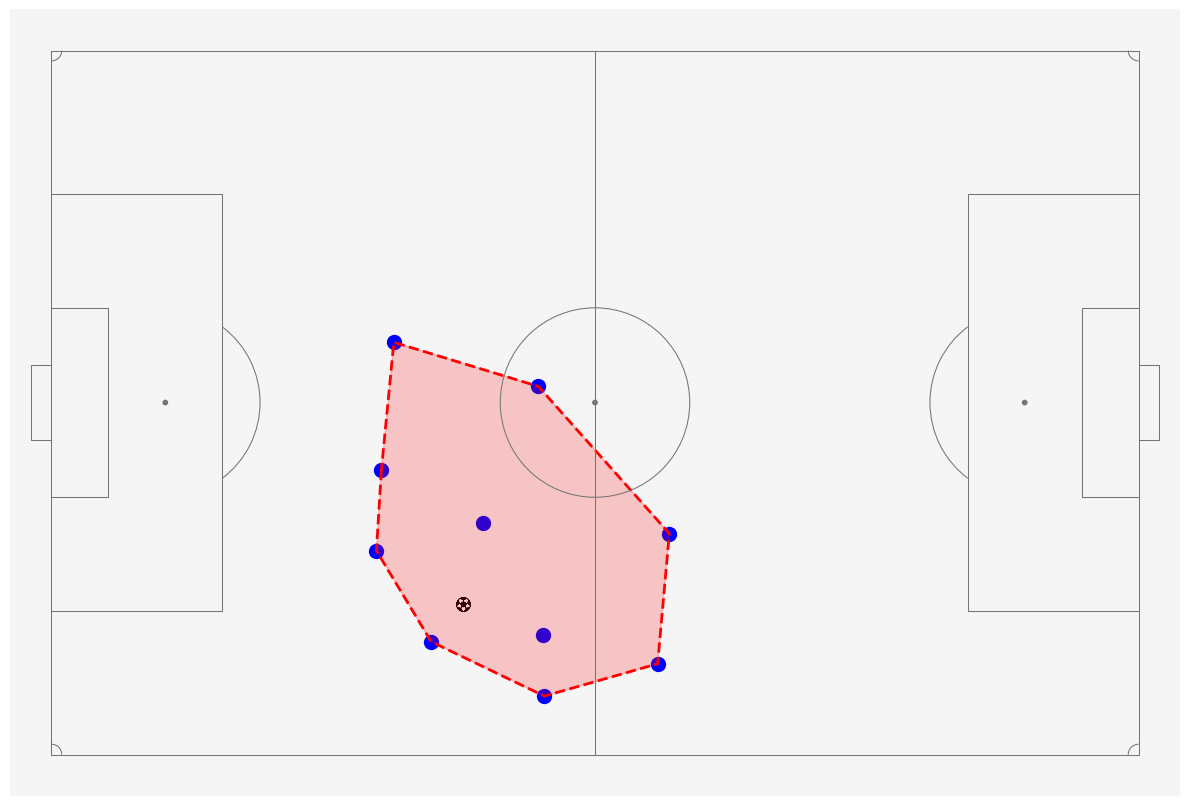

In [21]:
background_color = '#F5F5F5'
primary_text_color = '#000000'
secondary_text_color = '#757575'
primary_color = '#649CCB'
highlight_color = "#203490"



pitch = Pitch(pitch_type='skillcorner',
                      line_zorder=10,
                      line_color=secondary_text_color,
                      half=False,
                    pitch_color=background_color,
                      linewidth=.75,
                      axis=False,
                      corner_arcs=True,
                      goal_type='box',
                      pitch_length=105, pitch_width=68)
fig, ax = pitch.draw(figsize=(12, 10))
for point in points:
  pitch.scatter(point[0], point[1],
                    # size varies between 100 and 1900 (points squared)
                    s=100,
                    marker='o',
                    color='blue',
                    ax=ax)
  

# perímetro del convex hull
hull_path = list(hull.vertices) + [hull.vertices[0]]
ax.plot(points[hull_path, 0], points[hull_path, 1], 'r--', lw=2)


ax.fill(points[hull.vertices, 0],
        points[hull.vertices, 1],
        color='red', alpha=0.2, zorder=2)

pitch.scatter(df_players.ball_x, df_players.ball_y,
                    # size varies between 100 and 1900 (points squared)
                    s=100,
                    marker='football',
                    # color='black',
                    ax=ax)
# ax.show()

In [22]:
top_x = df_players.nlargest(1, 'x')
less_x = df_players.nsmallest(1, 'x')

min_x = less_x.x.values[0]
max_x = top_x.x.values[0]

depth = max_x - min_x
depth



np.float64(28.290000000000006)

In [23]:
top_y = df_players.nlargest(1, 'y')
less_y = df_players.nsmallest(1, 'y')

min_y = less_y.y.values[0]
max_y = top_y.y.values[0]
width = max_y - min_y
width

np.float64(34.17)

In [24]:


top5 = df_players.nlargest(5, 'x')
block_height = top5['x'].mean()
# o
# block_height = top5['x'].median()
block_height

np.float64(-0.4279999999999987)

In [25]:
deepest = df_players.nsmallest(1, 'x')
# line_height = top5['x'].mean()
# o
line_height = deepest.x.values[0]
line_height

np.float64(-21.11)